# ML DL Assignment 

## Predicting COVID19 Deaths using Holt-Winter's Method and ARIMA Models

### Name - Nitav Shah 
### Enrollment ID - 16103507
___

## Using Holt-Winter's Method
___

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, Holt
%matplotlib inline
data = pd.read_csv('case_time_series.csv', header=0, index_col=0, usecols=['Date','Total Deceased'])
data = data[(data != 0).all(1)]
data.head()

,Total Deceased
Date,
12 March,1
13 March,1
14 March,2
15 March,2
16 March,2


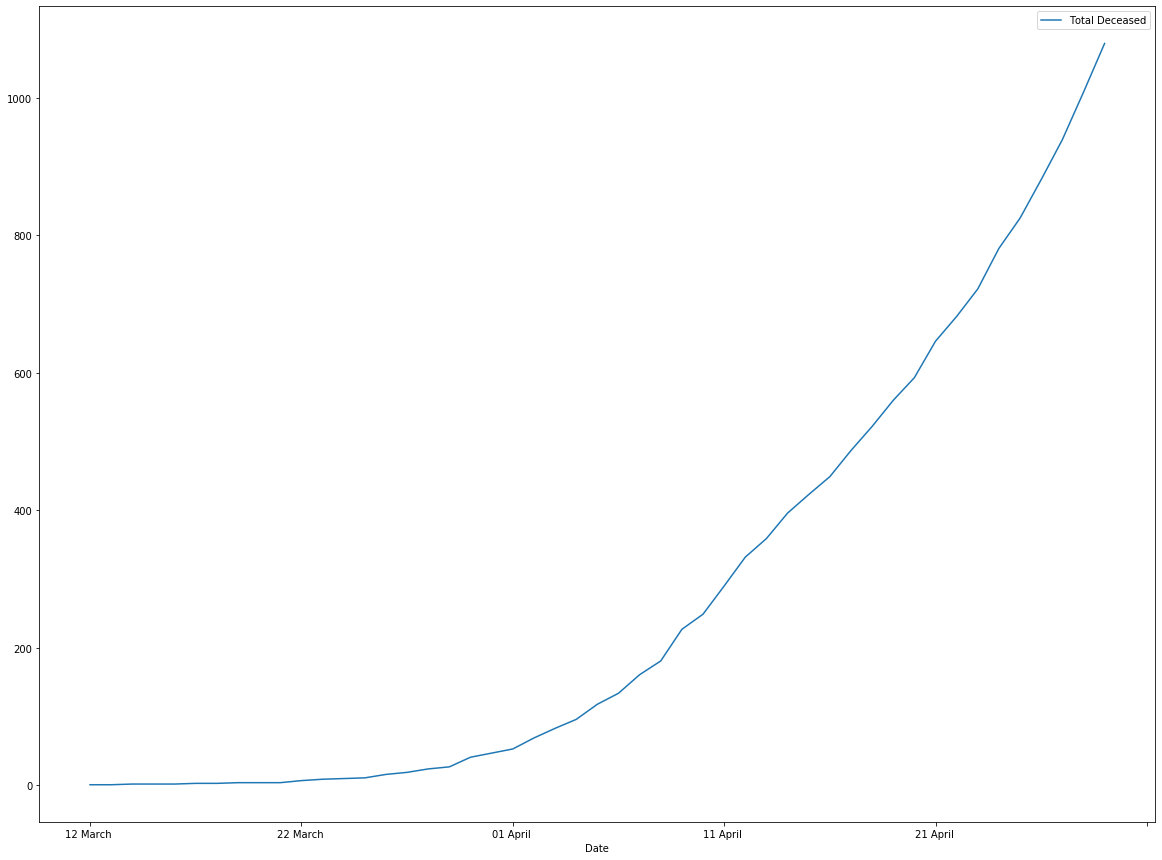

<Figure size 960x960 with 0 Axes>

In [10]:
data.plot()
plt.figure(figsize=(12,12), dpi = 80)
plt.rcParams['figure.figsize'] = [20, 15]
plt.show()

C:\Users\shahn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\shahn\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\shahn\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\shahn\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\shahn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\shahn\anaconda3\lib\site-packages\statsmodels\tsa\b

Daily Predictions of Deaths From 30th April to 9th May
49    1138.060313
50    1226.538707
51    1302.153490
52    1392.790617
53    1477.925938
54    1586.347287
55    1654.993275
56    1766.979892
57    1895.333586
58    2004.631500
dtype: float64


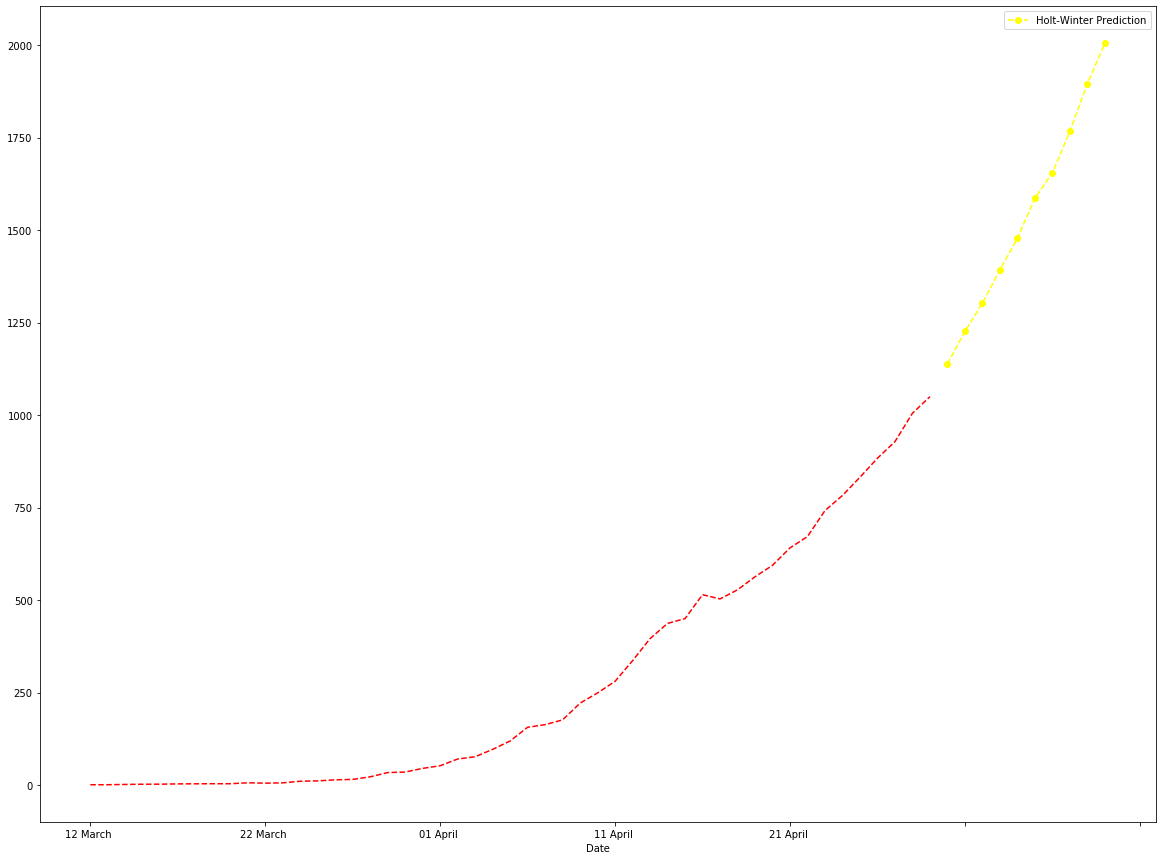

Forecasting deaths due to Covid19 using Holt-Winters method with additive seasonality.


In [3]:
fit1 = ExponentialSmoothing(data, seasonal_periods=7, trend='add', seasonal='add').fit(use_boxcox=True)
fit1.fittedvalues.plot(style='--', color='red')

fcast1 = fit1.forecast(10).rename("Holt-Winter Prediction")
fcast1.plot(style='--', marker='o', color='yellow', legend=True)

print('Daily Predictions of Deaths From 30th April to 9th May')
print(fit1.forecast(10))
plt.show()
print("Forecasting deaths due to Covid19 using Holt-Winters method with additive seasonality.")

## Prediction using Auto ARIMA
___

In [4]:
import pmdarima as pm
import numpy as np

In [5]:
data1 = pd.read_csv('case_time_series.csv', header=0, index_col=0)

In [6]:
data1.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,
30 January,1,1,0,0,0,0
31 January,0,1,0,0,0,0
01 February,0,1,0,0,0,0
02 February,1,2,0,0,0,0
03 February,1,3,0,0,0,0


In [7]:
df = data1['Total Deceased']

In [8]:
fit2 = pm.auto_arima(df, seasonal=False)
forecast = fit2.predict()

Daily Predictions of Deaths From 30th April to 9th May
[1150.55899758 1230.57254553 1311.45815817 1393.2158355  1475.84557752
 1559.34738423 1643.72125563 1728.96719171 1815.08519249 1902.07525796]


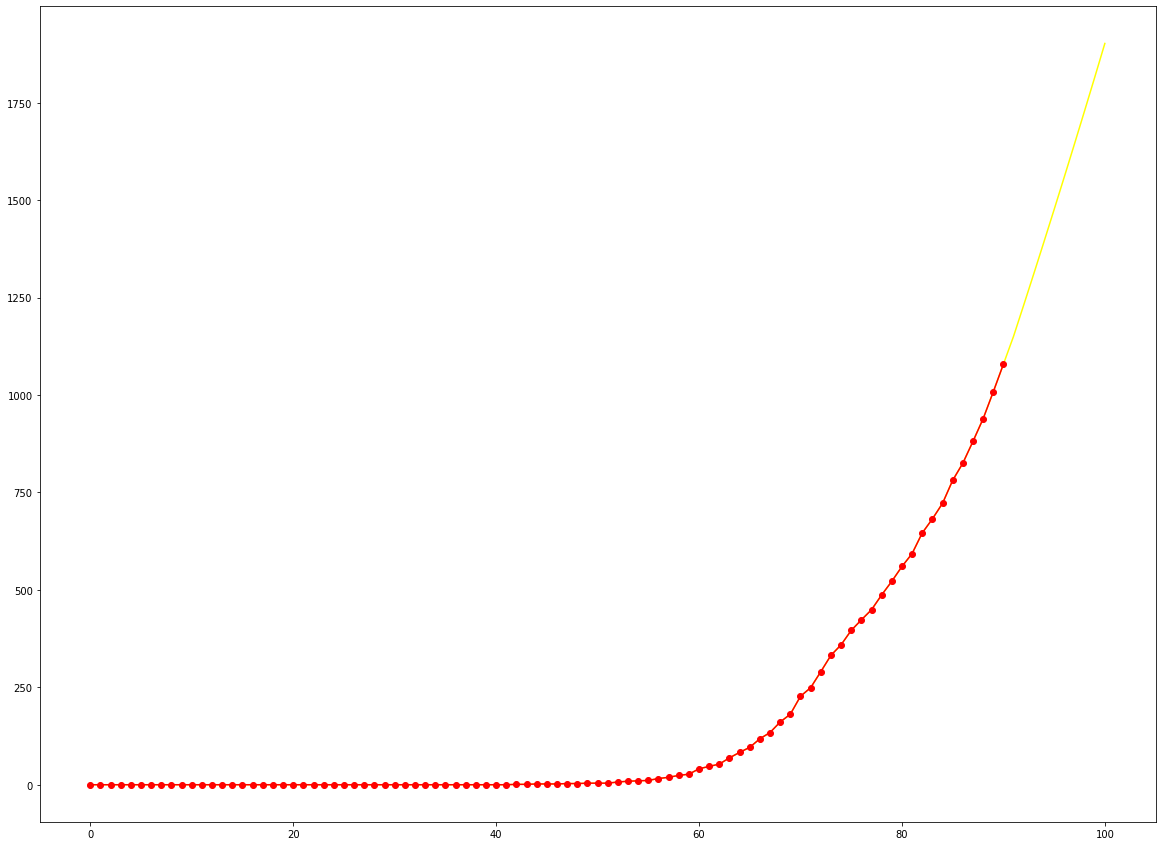

Forecasting deaths due to Covid19 using Auto Arima Method


In [9]:
print('Daily Predictions of Deaths From 30th April to 9th May')
print(forecast)
df_array = df.to_numpy()
plt.plot(np.concatenate([df_array,forecast]), c="yellow")
plt.plot(np.concatenate([df_array,forecast])[0:91], c="red", marker="o")
plt.savefig('foo.png')
plt.show()
print("Forecasting deaths due to Covid19 using Auto Arima Method")